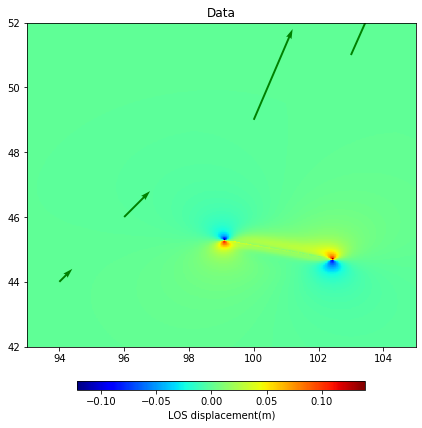

In [22]:
import rasterio
import rasterio.plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas
import numpy as np
import seaborn as sns
import json

raster_up = rasterio.open('/data/lxrtest/MODELOUT/pscmp/Bogd_test2/model4/poseis-10y_20y/poseis-10y_20y_up.tiff')
raster_ew = rasterio.open('/data/lxrtest/MODELOUT/pscmp/Bogd_test2/model4/poseis-10y_20y/poseis-10y_20y_east_west.tiff')
raster_ns = rasterio.open('/data/lxrtest/MODELOUT/pscmp/Bogd_test2/model4/poseis-10y_20y/poseis-10y_20y_north_south.tiff')
#shps_fault = geopandas.read_file('/data/lxrtest/Iraq/pysar/shp/AS2_fault.shp')

#read json
ew = json.loads(open('/data/lxrtest/MODELOUT/pscmp/Bogd_test2/model4/poseis-10y_20y/poseis-10y_20y_ew.json').read())
# attribuate
ul_lon = ew["ul_lon"]
ul_lat = ew["ul_lat"]
    
lat_step = ew["lat_step"]
lon_step = ew["lon_step"]

samples = ew["samples"]
rows = ew["rows"]

dr_lon = ul_lon + lon_step * (samples - 1)
dr_lat = ul_lat + lat_step * (rows - 1)

#displ = raster_displ.read(1)
#displ_range = round(max(abs(np.nanmax(displ)),abs(np.nanmin(displ)),4))
up = raster_up.read(1)
up_min = up.min()
up_max = up.max()

ew = raster_ew.read(1)
ns = raster_ns.read(1)

row,colm = ew.shape

x_row = np.arange(ul_lon, dr_lon, lon_step)
x_axis = np.tile(x_row, (row, 1))# colm number of each pixel
y_colm = np.arange(ul_lat, dr_lat, lat_step)
y_axis = np.tile(y_colm, (colm, 1)).transpose()

u = ew
v = ns

x_axis = np.array([[94,96],[100,103]])
y_axis = np.array([[44,46],[49,51]])
u = np.array([[1,2],[3,4]])
v = np.array([[1,2],[7,9]])
cmap = plt.cm.jet
figure_size = [8.0,3.0]
fig,axes = plt.subplots(1, 1, figsize = figure_size)
#f,axes = plt.subplots(1)
#ax1 = axes[0] 

rasterio.plot.show(raster_up , 1, ax = axes, vmin = up_min, vmax = up_max, cmap = cmap)
#shps_fault.plot(color='black',ax = ax1)
axes.quiver(x_axis, y_axis, u, v, color='g',width=0.005, scale=30)
axes.title.set_text('Data')

# add colorbar (need to define your custom ScalarMappable(an example about how to plot without using imshow function))
cax1 = fig.add_axes([0.35, -0.2, 0.5, 0.04])#define the position of ax1
sm1 = plt.cm.ScalarMappable(cmap=cmap)
sm1.set_array([])
sm1.set_clim(vmin = up_min, vmax = up_max)
fig.colorbar(sm1,cax1, orientation = 'horizontal', label = 'LOS displacement(m)')

left_adjust = 0
bottom_adjust = 0
right_adjust = 1.2
top_adjust = 1.5
plt.subplots_adjust(left = left_adjust, bottom = bottom_adjust , right = right_adjust, top = top_adjust, wspace = 0.1, hspace = 0.2 )

#设置横纵坐标刻度值大小及字体
font1 = {'family' : 'Times New Roman',
         'weight': 'normal',
         'size' : 13.}

# add vector of horizontal displacement

plt.show()


#save figure
#fig_name = 'Afterslip_20191223.png'
#fig_output = '/data2/rsmasdata/lvxr/pysar/gbis_disp/AS/' + fig_name
#fig.savefig(fig_output, dpi=300, bbox_inches='tight')